In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

import warnings
warnings.filterwarnings('ignore')

train= pd.read_csv('train_data.csv')
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [2]:
train.isna().sum() # check for null values

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [3]:
# fill null values with mode of the data
import statistics
train['Bed Grade'].fillna(statistics.mode(train['Bed Grade']),inplace=True)
train['City_Code_Patient'].fillna(statistics.mode(train['City_Code_Patient']),inplace=True)

In [4]:
# remove ids
train.drop(['case_id','patientid'], axis=1, inplace=True)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int64  
 1   Hospital_type_code                 318438 non-null  object 
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Hospital_region_code               318438 non-null  object 
 4   Available Extra Rooms in Hospital  318438 non-null  int64  
 5   Department                         318438 non-null  object 
 6   Ward_Type                          318438 non-null  object 
 7   Ward_Facility_Code                 318438 non-null  object 
 8   Bed Grade                          318438 non-null  float64
 9   City_Code_Patient                  318438 non-null  float64
 10  Type of Admission                  318438 non-null  object 
 11  Severity of Illness                3184

In [5]:
# differentiate between categorical features and numerical
cat_cols=[]
num_cols=[]

for col in train.columns:
    if train[col].dtypes=='object':
        cat_cols.append(col)
        
for col in train.columns:
    if train[col].dtypes!='object':
        num_cols.append(col)
        
print(cat_cols)
print(num_cols)

['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age', 'Stay']
['Hospital_code', 'City_Code_Hospital', 'Available Extra Rooms in Hospital', 'Bed Grade', 'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit']


In [6]:
# Bed grade is float values are 1.0, 2.0, 3.0, 4.0, convert these to 0,1,2,3 for encoded values
train['Bed Grade'] = train['Bed Grade'].astype(int)
train['Bed Grade'] = train['Bed Grade'].apply(lambda x: x-1)
train

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,3,Z,3,radiotherapy,R,F,1,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,c,5,Z,2,radiotherapy,S,F,1,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,10,e,1,X,2,anesthesia,S,E,1,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,26,b,2,Y,2,radiotherapy,R,D,1,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,26,b,2,Y,2,radiotherapy,S,D,1,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,a,6,X,3,radiotherapy,Q,F,3,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,24,a,1,X,2,anesthesia,Q,E,3,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,7,a,4,X,3,gynecology,R,F,3,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,11,b,2,Y,3,anesthesia,Q,D,2,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [7]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
cat_cols.append('City_Code_Hospital')
cat_cols.append('City_Code_Patient')
for col in cat_cols:
    train[col]= le.fit_transform(train[col])
cat_cols

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Type of Admission',
 'Severity of Illness',
 'Age',
 'Stay',
 'City_Code_Hospital',
 'City_Code_Patient']

In [8]:
num_cols.remove('Bed Grade')
num_cols.remove('City_Code_Hospital')
num_cols.remove('City_Code_Patient')
num_cols

['Hospital_code',
 'Available Extra Rooms in Hospital',
 'Visitors with Patient',
 'Admission_Deposit']

In [9]:
# scale numerical values
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()

train[num_cols]= ss.fit_transform(train[num_cols].values)
train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,-1.195176,2,2,2,-0.169177,3,2,5,1,6,0,0,-0.727923,5,0.027835,0
1,-1.890124,2,4,2,-1.025217,3,3,5,1,6,1,0,-0.727923,5,0.987556,4
2,-0.963527,4,0,0,-1.025217,1,3,4,1,6,1,0,-0.727923,5,-0.124910,3
3,0.889668,1,1,1,-1.025217,3,2,3,1,6,1,0,-0.727923,5,2.200319,4
4,0.889668,1,1,1,-1.025217,3,3,3,1,6,1,0,-0.727923,5,0.623175,4


In [10]:
from sklearn.model_selection import train_test_split

y= train['Bed Grade']
X= train.drop('Bed Grade', axis=1)
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size= 0.2, stratify=y, random_state=7)

In [12]:
# Using Trusty XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

xgb = XGBClassifier(use_label_encoder=False)
xgb.fit(X_train,y_train)
y_pred= xgb.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)

[21:00:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [13]:
print("XGBoost Accuracy: {}%".format(round(accuracy*100,2)))

XGBoost Accuracy: 51.35%


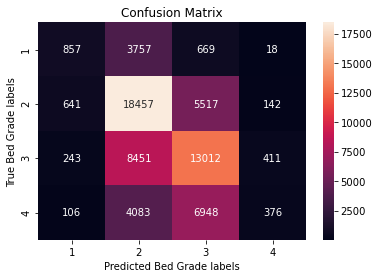

In [14]:
# Display confusion matrix 
cm = confusion_matrix(y_test, y_pred)
labels = ['1', '2','3','4']
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 
ax.set_xlabel('Predicted Bed Grade labels');ax.set_ylabel('True Bed Grade labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.show()